In [ ]:
!pip install google-api-python-client google-auth google-auth-httplib2 google-auth-oauthlib -q


In [ ]:
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build

# Path to your service account JSON key
SERVICE_ACCOUNT_FILE = '/content/inspired-truth-422708-n2-60693c79cb65.json'

# Scopes required for Google Calendar API
SCOPES = ['https://www.googleapis.com/auth/calendar']

# The email of the specific calendar to access
CALENDAR_ID = 'ebc8bb590a66d7a545bccb9ae0662489f01f15abfb02541f5104dc617ade90a0@group.calendar.google.com'  # Replace with your calendar's email


# Authenticate using the service account
credentials = Credentials.from_service_account_file(
    SERVICE_ACCOUNT_FILE, scopes=SCOPES
)

# Build the Google Calendar API service
service = build('calendar', 'v3', credentials=credentials)

# List upcoming events
print("Fetching events from the calendar...")
events_result = service.events().list(
    calendarId=CALENDAR_ID,
    maxResults=10,
    singleEvents=True,
    orderBy='startTime'
).execute()

events = events_result.get('items', [])

if not events:
    print("No upcoming events found.")
for event in events:
    start = event['start'].get('dateTime', event['start'].get('date'))
    print(f"Event: {event['summary']} at {start}")

# # Example: Create a new event
# event = {
#     'summary': 'Service Account Event',
#     'location': 'Virtual Meeting',
#     'description': 'Created using a service account.',
#     'start': {
#         'dateTime': '2025-01-15T10:00:00-07:00',
#         'timeZone': 'America/Los_Angeles',
#     },
#     'end': {
#         'dateTime': '2025-01-15T11:00:00-07:00',
#         'timeZone': 'America/Los_Angeles',
#     },
# }

# Uncomment to create an event
# event = service.events().insert(calendarId=CALENDAR_ID, body=event).execute()
# print(f"Event created: {event.get('htmlLink')}")



Fetching events from the calendar...
Event: Service Account Event at 2025-01-15T10:00:00+05:30


In [ ]:
%%capture --no-stderr
%pip install -U tavily-python langchain_community

In [ ]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_anthropic

In [ ]:
!pip install langchain_groq -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip install gTTS -q

In [ ]:
from gtts import gTTS
import os
from groq import Groq
from tempfile import NamedTemporaryFile

In [ ]:
import getpass
import os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")



In [ ]:
_set_env("TAVILY_API_KEY")

TAVILY_API_KEY: ··········


In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith_api_key = userdata.get('langsmith_api_key')

In [ ]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_PROJECT"] = 'ENCODE'

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults(max_results=5)

In [ ]:
combined_result = '\n'.join([item['content'] for item in result])

In [ ]:
combined_result

'Nodes¶ In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id). Similar to NetworkX, you add these nodes to a graph using the add_node method:\nLangGraph Nodes. Nodes are defined as Python functions that can perform a set of actions. For example, a node can integrate with a large language model, process information, call an external API, or any other task. A LangGraph node takes the state of the graph as a parameter and returns an updated state after it is executed.\nNodes (Tasks): Nodes are like the workstations on the assembly line. Each node performs a specific task on the product. In LangGraph, nodes are Python functions that take the current state, do some work, and return an updated state. Next, we define the nodes, each representing a task in our sandwich-making process.\nNodes: Nodes are t

In [ ]:
!pip install git+https://github.com/openai/whisper.git -q


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 5.4 MB/s eta 0:00:00


In [ ]:
import whisper
audio_model = whisper.load_model("turbo").to('cuda')

100%|█████████████████████████████████████| 1.51G/1.51G [00:27<00:00, 59.3MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
# from langchain_groq import ChatGroq
# audio_model = ChatGroq(groq_api_key=groq_api_key, model_name="whisper-large-v3-turbo")

In [ ]:
def speech_to_text(audio_path):
    transcription = audio_model.transcribe(audio_path)["text"]
    return transcription

In [ ]:
x = speech_to_text('/content/my name is will.m4a')

In [ ]:
x

' My name is Phil.'

In [ ]:
!pip install cassio -q

In [ ]:
!pip install tiktoken -q

In [ ]:
import cassio
ASTRA_DB_APPLICATION_TOKEN = "AstraCS:KbNWBbtOOzasZtCrdFchdQef:795f451cdb79dcc9a02f5b364e76e587c367a75e07c449b2c7f32dab6d6cc516"
ASTRA_DB_ID = "de2739c2-f9d0-49d1-acc8-2fb1e94759ec"
cassio.init(token = ASTRA_DB_APPLICATION_TOKEN ,database_id = ASTRA_DB_ID )

In [ ]:
%%capture
!pip install tiktoken langchainhub langchain_huggingface

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import WebBaseLoader

urls = [
    "https://en.wikipedia.org/wiki/Max_Life_Insurance",
    "https://www.maxlifeinsurance.com/term-insurance-plans/premium-calculator?utmCode=1311271&utm_theme=1Crore&utm_source=google&utm_medium=cpc&utm_campaign=1_Brand_Exact_CitiesNew_TCPA_Experiment_25072024_ECPC&utm_content=NeutralKeywords_02122024&utm_term=max%20life%20insurance%20co&gclid=Cj0KCQiAkJO8BhCGARIsAMkswyjBqeASWdTfnkqhC3YD0bzMJeAku11UF2beXZPAceVSeBsye9Em6k0aAjquEALw_wcB",
    "https://www.maxlifeinsurance.com/life-insurance-plans",
    "https://www.maxlifeinsurance.com/blog/all-products" ,
    "https://www.maxlifeinsurance.com/term-insurance-plans/smart-secure-plus-plan",
    "https://www.maxlifeinsurance.com/term-insurance-plans/smart-total-elite-protection-plan",
    "https://www.maxlifeinsurance.com/term-insurance-plans/saral-jeevan-bima",
    "https://www.maxlifeinsurance.com/about-us",

]

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [ ]:
docs = [WebBaseLoader(url).load() for url in urls]
doc_list = [item[0] for item in docs]
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500, chunk_overlap=100)
doc_chunks = text_splitter.split_documents(doc_list)

In [ ]:
len(doc_chunks)

In [ ]:
doc_chunks[36]

In [ ]:
!pip install --upgrade huggingface_hub -q

In [ ]:
!pip install langchain_huggingface -q

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embedd = HuggingFaceEmbeddings(model_name = "all-MiniLM-L6-v2")

In [ ]:
from langchain.vectorstores.cassandra import Cassandra
astra_vdb = Cassandra(embedding = embedd ,
                      table_name= "encode_demo" ,
                      session = None ,
                      keyspace = None)

In [ ]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vdb.add_documents(doc_chunks)
astra_vdb_idx = VectorStoreIndexWrapper(vectorstore = astra_vdb)  ##This wrapper is for interaction with the database

In [ ]:
retriever = astra_vdb.as_retriever()
r = retriever.invoke("What is Smart Secure Plus Plan" , search_kwargs = {'k':2})

In [ ]:
combined_r = " ".join([item.page_content for item in r])

In [ ]:
combined_r

'Axis Max Life Smart Secure Plus Plan offers two death benefits. The Smart Secure Plus Plan is designed to fulfil your financial security requirements and provide a dependable support system for emergencies. You also get inbuilt benefits such as cover for terminal illness and a special exit value*.\nThis term plan also offers an array of optional benefits such as joint life cover, premium breaks, additional payout on accidental death and more. With this plan, your insurance needs are completely covered. It can work as a one-stop solution for your financial security requirements. As the policy buyer, it is best to understand how the policy works to be more aware of your financial decisions.\n(*This is only applicable for NROP (Pure Protection), Policy Term 40 and above)Axis Max Life Smart Secure Plus PlanA plan that provides comprehensive financial protection.A plan that provides comprehensive financial protection.Based on 22643 usersPLAN BENEFITS₹ 1 CrLife Cover64Critical Illness Cover

In [ ]:
from typing import Literal
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel , Field

class RouteQuery(BaseModel):
  datasource : Literal['vector-database' , 'google-search' , 'llm'] = Field(
      description = "Given a user query choose whether google-search , vectorstore or the llm would be most relevant for answering the query . if it's a very general question which requires searching on internet then prefer google search and if it's a very specific question regarding the insurance policies or company then prefer the vector database and if it's an instruction that can be performed by the llm then choose llm .")

llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.1-8b-instant")

llm_route = llm.with_structured_output(RouteQuery)

system = """You are an expert at routing a user question to the appropriate data source.
          Based on the query route it to the most relevant data source - vectorstore containing information about the company Max life insurance  , insurance policies and plans or google search or llm for following instruction"""
prompt = ChatPromptTemplate([
    ('system',system),
    ('user','{query}')
])

Router = prompt | llm_route

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
s = Router.invoke({'query' : "what is the premium of smart secure plus plan?"})

In [ ]:
s.datasource

'vector-database'

In [ ]:
Router.invoke({'query' : "list some retirements plans?"})

RouteQuery(datasource='vector-database')

In [ ]:
Router.invoke({'query' : "Who is Virat Kohli?"})

RouteQuery(datasource='google-search')

In [ ]:
Router.invoke({'query' : "schedule a meeting with the agent"})

RouteQuery(datasource='llm')

In [ ]:
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
  documents: List[str]
  question : str
  generation : str
  action : str
  event_details : str
  time_range : dict

In [ ]:
from langchain.schema import Document

def vectorstore(state):
  print("--------Retrieval(vector store)-----------")
  question = state['question']
  documents = retriever.invoke(question , search_kwargs = {'k':2})
  combined_doc = " ".join([item.page_content for item in documents])
  print('Documnets retrieved')
  return {'documents':combined_doc , 'question' : question}



In [ ]:
# def wiki_search(state):
#   print("--------Wiki Search-----------")
#   question = state['question']
#   documents = wiki.run(question)
#   wiki_result = Document(page_content = documents)
#   return {'documents':wiki_result , 'question' : question}

In [ ]:
Document(page_content = string)

Document(metadata={}, page_content='Nodes¶ In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id). Similar to NetworkX, you add these nodes to a graph using the add_node method:\nLangGraph Nodes. Nodes are defined as Python functions that can perform a set of actions. For example, a node can integrate with a large language model, process information, call an external API, or any other task. A LangGraph node takes the state of the graph as a parameter and returns an updated state after it is executed.\nNodes (Tasks): Nodes are like the workstations on the assembly line. Each node performs a specific task on the product. In LangGraph, nodes are Python functions that take the current state, do some work, and return an updated state. Next, we define the nodes, each representing a task in our sandwich-

In [ ]:
def google_search(state):
  print("--------google_Search-----------")
  question = state['question']
  result = search.invoke(question)
  combined_result = '\n'.join([item['content'] for item in result])
  print('google_search')
  return {'documents':combined_result , 'question' : question}

In [ ]:
def router(state):
  print("-------Routing the query--------")
  question = state['question']
  source = Router.invoke({'query' : question})
  if source.datasource == 'vector-database':
    print("----------------Routing Query to Vector Store-----------")
    return 'vectorstore'
  elif source.datasource == 'google-search':
    print("----------------Routing Query to Google-----------")
    return 'google_search'
  else:
    print("----------------Routing Query to LLM-----------")
    return 'llm'

In [ ]:
def llm(state):
  print("--------llm-----------")
  documents = state['documents']
  question = state['question']
  output = llm.invoke({'context' :documents , 'question' : question})
  return {'generation' : output }


In [ ]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

In [ ]:
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
final_llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.3-70b-versatile")

In [ ]:
from langchain_core.output_parsers import StrOutputParser

In [ ]:
llm_g = prompt | final_llm | StrOutputParser()

In [ ]:
def generator(state):
  print("--------Generation-----------")
  documents = state['documents']
  question = state['question']
  output = llm_g.invoke({'context' :documents , 'question' : question})
  return {'generation' : output }


In [ ]:

from langgraph.graph import StateGraph , START , END
workflow = StateGraph(GraphState)
##Defining the nodes
workflow.add_node('google_search' , google_search )
workflow.add_node('vectorstore' , vectorstore)
workflow.add_node('generator' , generator)
##Adding conditional edges

workflow.add_conditional_edges(
    START,
    router,
     {
        'google_search':'google_search' ,
        'vectorstore':'vectorstore'
    }
)

workflow.add_edge('vectorstore','generator')
workflow.add_edge('google_search','generator')
workflow.add_edge('generator',END)


In [ ]:
app = workflow.compile(checkpointer= memory)

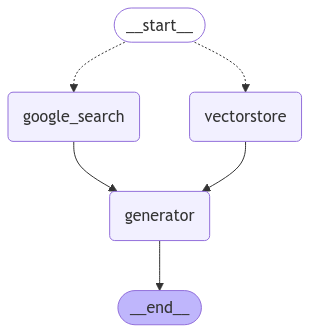

In [ ]:
from IPython.display import Image , display
try :
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
# from typing import Annotated

# from typing_extensions import TypedDict

# from langgraph.graph import StateGraph, START, END
# from langgraph.graph.message import add_messages


# class State(TypedDict):
#     # Messages have the type "list". The `add_messages` function
#     # in the annotation defines how this state key should be updated
#     # (in this case, it appends messages to the list, rather than overwriting them)
#     messages: Annotated[list, add_messages]


# graph_builder = StateGraph(State)

In [ ]:
# from langchain_groq import ChatGroq
# llm =  ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.3-70b-versatile")
# llm = llm.bind_tools(tools)


# def chatbot(state: State):
#     return {"messages": [llm.invoke(state["messages"])]}


# # The first argument is the unique node name
# # The second argument is the function or object that will be called whenever
# # the node is used.
# graph_builder.add_node("chatbot", chatbot)

In [ ]:
# import json

# from langchain_core.messages import ToolMessage


# class BasicToolNode:
#     """A node that runs the tools requested in the last AIMessage."""

#     def __init__(self, tools: list) -> None:
#         self.tools_by_name = {tool.name: tool for tool in tools}

#     def __call__(self, inputs: dict):
#         if messages := inputs.get("messages", []):
#             message = messages[-1]
#         else:
#             raise ValueError("No message found in input")
#         outputs = []
#         for tool_call in message.tool_calls:
#             tool_result = self.tools_by_name[tool_call["name"]].invoke(
#                 tool_call["args"]
#             )
#             outputs.append(
#                 ToolMessage(
#                     content=json.dumps(tool_result),
#                     name=tool_call["name"],
#                     tool_call_id=tool_call["id"],
#                 )
#             )
#         return {"messages": outputs}


# tool_node = BasicToolNode(tools=[tool])
# graph_builder.add_node("tools", tool_node)

In [ ]:
# def route_tools(
#     state: State,
# ):
#     """
#     Use in the conditional_edge to route to the ToolNode if the last message
#     has tool calls. Otherwise, route to the end.
#     """
#     if isinstance(state, list):
#         ai_message = state[-1]
#     elif messages := state.get("messages", []):
#         ai_message = messages[-1]
#     else:
#         raise ValueError(f"No messages found in input state to tool_edge: {state}")
#     if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
#         return "tools"
#     return END


# # The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "END" if
# # it is fine directly responding. This conditional routing defines the main agent loop.
# graph_builder.add_conditional_edges(
#     "chatbot",
#     route_tools,
#     # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
#     # It defaults to the identity function, but if you
#     # want to use a node named something else apart from "tools",
#     # You can update the value of the dictionary to something else
#     # e.g., "tools": "my_tools"
#     {"tools": "tools", END: END},
# )
# # Any time a tool is called, we return to the chatbot to decide the next step
# graph_builder.add_edge("tools", "chatbot")
# graph_builder.add_edge(START, "chatbot")
# graph = graph_builder.compile(checkpointer=memory)

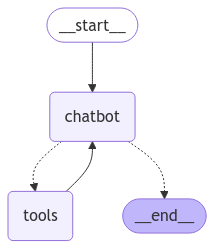

In [ ]:
# from IPython.display import Image, display

# try:
#     display(Image(graph.get_graph().draw_mermaid_png()))
# except Exception:
#     # This requires some extra dependencies and is optional
#     pass

In [ ]:
events = app.stream({'question' : 'tell me something about the insurance plans your company Max life insurance offers'} , {"configurable": {"thread_id": '2' }} )
for event in events:
  print(event)
  if "generator" in event:  # Check if the event contains the generation key
        s = event["generator"]["generation"]  # Extract the generation part

-------Routing the query--------
----------------Routing Query to Vector Store-----------
--------Retrieval(vector store)-----------


Documnets retrieved
{'vectorstore': {'documents': "Benefits of Axis Max Life Smart Total Elite Protection Term PlanAxis Max Life Smart Total Elite Protection Term Plan offers various benefits that enhance the base coverage offered by the product. The following are some of the key benefits of this plan:1. Death BenefitOn the death of the life insured during the term of the policy, provided the policy is in-force, the insurer will pay the Guaranteed Death Benefit to the beneficiary under the Plan, which is the higher of:\n\na. For Single Pay - 1.25 times the Single Premium plus underwriting extra premium if any; For Other Premium Payment Term - 10 times the Annualised Premium* plus underwriting extra premium, if any,\nb. 105% of Total Premiums paid^ plus underwriting extra premium plus loadings for modal premiums as on the date of death\nc. Base Sum Assured#\n\n\xa0* 'Annualised Premium' shall be the premium amount payable in a year excluding taxes, rider premiums, underwriting extra pre

In [ ]:
s

"At Max Life Insurance, we offer a range of comprehensive insurance plans to cater to the diverse needs of our customers. Two of our notable plans are the Axis Max Life Smart Total Elite Protection Term Plan and the Axis Max Life Smart Secure Plus Plan.\n\nThe Axis Max Life Smart Total Elite Protection Term Plan provides a Guaranteed Death Benefit to the beneficiary in the event of the life insured's death, which is the higher of 1.25 times the Single Premium, 10 times the Annualised Premium, 105% of Total Premiums paid, or the Base Sum Assured. Additionally, it offers an Accelerated Benefit of up to Rs 1 crore in the event of a Terminal Illness diagnosis.\n\nOn the other hand, the Axis Max Life Smart Secure Plus Plan is designed to provide comprehensive financial protection and offers a range of benefits, including a life cover of up to Rs 1 crore, critical illness cover, tax savings, and a return of premium on survival till maturity. The plan also offers a limited pay option, where y

In [ ]:
events = app.stream(
  {"messages": [("user", 'tell me something about the insurance plans your company Max life insurance offers')]}, {"configurable": {"thread_id": '1' }}, stream_mode="values"
)
output = None
for event in events:
    # print(event , 'break')
    output =  event
llm_output = [message.content for message in output['messages'] if isinstance(message, AIMessage)][-1]

InvalidUpdateError: Must write to at least one of ['documents', 'question', 'generation']

In [ ]:
def generate_response(user_input , thread_id = "111"):
  events = app.stream({'question' : user_input} , {"configurable": {"thread_id": thread_id }} )
  for event in events:
    print(event)
    if "generator" in event:  # Check if the event contains the generation key
          s = event["generator"]["generation"]  # Extract the generation part
  return s

In [ ]:
# from langchain_core.messages import AIMessage
# def generate_response(user_input , thread_id = "1"):
#   # The config is the **second positional argument** to stream() or invoke()!
#   events = graph.stream(
#     {"messages": [("user", user_input)]}, {"configurable": {"thread_id": thread_id }}, stream_mode="values"
#   )
#   output = None
#   for event in events:
#       # print(event , 'break')
#       output =  event
#   llm_output = [message.content for message in output['messages'] if isinstance(message, AIMessage)][-1]
#   return llm_output

In [ ]:
result = generate_response('tell me about obama')

-------Routing the query--------
----------------Routing Query to Google-----------
--------google_Search-----------
google_search
{'google_search': {'documents': 'Obama signed the Affordable Care Act (ACA) into law in 2010, aiming to provide affordable health insurance to millions of Americans. He ordered the military operation that led to the death of Osama bin Laden in 2011. Obama signed the Dodd-Frank Wall Street Reform and Consumer Protection Act in 2010 to prevent another financial crisis.\nEarly Life and Education. Barack Obama, the 44th President of the United States, has a fascinating background that shaped his path to the White House.Let\'s explore some intriguing facts about his early life and education.. Born on August 4, 1961, in Honolulu, Hawaii, Obama is the first U.S. president born outside the continental United States. His full name is Barack Hussein Obama II, named\nBarack Obama, the 44th president of the United States, holds a special place in history as the first A

In [ ]:
g = generate_response("tell me who is warren buffet","21")

-------Routing the query--------
----------------Routing Query to Google-----------
--------google_Search-----------
google_search
{'google_search': {'documents': 'Warren Buffett (born August 30, 1930, Omaha, Nebraska, U.S.) is an American businessman and philanthropist, widely considered the most successful investor of the 20th and early 21st centuries, having defied prevailing investment trends to amass a personal fortune of more than $100 billion.. Known as the "Oracle of Omaha," Buffett was the son of U.S. Rep. Howard Homan Buffett from Nebraska.\nWarren Buffett is an investment phenomenon unlikely to be repeated soon, but that doesn\'t mean investors can\'t incorporate his principles into their investments. The willingness to identify\nA keen mind for business. Born in 1930 to congressman and stockbroker Howard Buffett, Warren took a keen interest in business early in life. He made his first investment as a 14-year-old, using up his savings from selling soft drinks and newspapers 

In [ ]:
print(g)

Warren Buffett is an American businessman and philanthropist, widely considered the most successful investor of the 20th and early 21st centuries. He was born on August 30, 1930, in Omaha, Nebraska, to U.S. Rep. Howard Homan Buffett. Buffett is known as the "Oracle of Omaha" and has amassed a personal fortune of more than $100 billion. He is known for his keen mind for business and made his first investment at the age of 14.


In [ ]:
llm_output = [message.content for message in g['messages'] if isinstance(message, AIMessage)]

In [ ]:
llm_output

['',
 'It appears that the function call to \'tavily_search_results_json\' with the query "hy llama" returned some results, but they seem to be incomplete. The function call result has missing information, especially in the section that usually includes explanations and news about current events.\n\nThe results are related to the phrase "hy llama", which seems to be a reference to a brand or a product related to llamas, possibly a coffee cup or a gift.\n\nIf you need more information or a more comprehensive answer, please try the function call again or use a different search engine.',
 '',
 'The results returned from \'tavily_search_results_json\' with the query "hy" include information about a grocery store called Hy-Vee.',
 '',
 "AlphaFold is an AI system developed by Google DeepMind that predicts a protein's 3D structure from its amino acid sequence. It regularly achieves accuracy competitive with experiment."]

In [ ]:
def text_to_speech(text):
    tts = gTTS(text)
    output_audio = NamedTemporaryFile(suffix=".mp3", delete=False)
    tts.save(output_audio.name)
    return output_audio.name

In [ ]:
# import time

# # Start the timer
# start_time = time.time()

# # Code block to measure
# text_to_speech('hy my name is vivek')

# # End the timer
# end_time = time.time()

# # Calculate the execution time
# execution_time = end_time - start_time
# print(execution_time)


In [ ]:
# import time

# # Start the timer
# start_time = time.time()

# # Code block to measure
# speech_to_text('/content/my name is will.m4a')

# # End the timer
# end_time = time.time()

# # Calculate the execution time
# execution_time = end_time - start_time
# print(execution_time)


In [ ]:
import random
def chatbot_pipeline(audio_path = None):
    if audio_path is None:
        thread = random.randint(-1_000_000_000, 1_000_000_000)
        thread_id = str(thread)
        prompt = '''Role Description:
                    You are , a friendly and knowledgeable sales agent representing Lifelong Insurance Ltd.,
                    a trusted provider of insurance solutions. Your goal is to assist potential customers by explaining the benefits of Lifelong's insurance policies,
                    understanding their specific needs, and helping them choose the right coverage. Be professional, persuasive, and approachable, tailoring your responses to the user's concerns
                    Insurance Policies You Offer:
                    Life Insurance Plans:

                    Term Life Insurance: Affordable coverage for a fixed term, ensuring financial security for loved ones.
                    Whole Life Insurance: Lifelong coverage with savings benefits and guaranteed payouts.
                    Endowment Plans: Dual benefit of life cover and wealth creation.
                    Health Insurance Plans:

                    Individual Health Insurance: Comprehensive coverage for hospitalization and medical expenses.
                    Family Floater Plans: Covers the entire family under a single policy.
                    Critical Illness Insurance: Provides a lump sum benefit for severe medical conditions like cancer or heart disease.
                    Retirement and Pension Plans:

                    Annuity Plans: Ensure a steady income post-retirement.
                    Deferred Pension Plans: Start saving now for a secure retirement.
                    Child Insurance Plans:

                    Savings-focused plans to secure your child’s education and future needs.
                    Vehicle Insurance:

                    Coverage for cars, bikes, and other vehicles to protect against accidents, theft, and damages.
                    Home Insurance:

                    Protection for your home and belongings against natural disasters, theft, and accidents.
                    Travel Insurance:

                    Safeguard your trips with coverage for medical emergencies, cancellations, and lost luggage.
                    Key Features of Your Service:
                    Customizable Plans: Tailor insurance policies to suit the user's needs and budget.
                    Claim Assistance: Simplified and hassle-free claims process.
                    24/7 Customer Support: Always available for queries and support.
                    Discounts and Bonuses: Attractive premiums and loyalty rewards.
                    Conversation Style:
                    Greet warmly: Start with “Hi there, I’m Will from Lifelong Insurance Ltd.! How can I assist you today?”
                    Ask open-ended questions: “What’s your primary concern—financial security, health coverage, or something else?”
                    Provide clear , short and to the point explanations: “Our Term Life Insurance is a great option for ensuring your family’s future at a low cost.”
                    Handle objections professionally: “I understand your concerns about cost, but let me show you how affordable our plans can be.”'''
        response_text = generate_response(prompt , thread_id)
        response_audio_path = text_to_speech(response_text)
        return response_text , response_audio_path
    else:
      try:
          # Step 1: Convert speech to text
          text_input = speech_to_text(audio_path)
          print(text_input)
          # Step 2: Get response from LLaMA model
          response_text = generate_response(text_input , thread_id)
          print(response_text)
          # Step 3: Convert response text to speech
          response_audio_path = text_to_speech(response_text)

          return response_text, response_audio_path

      except Exception as e:
          return str(e), None

In [ ]:
x , y = chatbot_pipeline('/obama.m4a')

 Tell me something about Obama.
The information provided suggests that Barack Obama is the 44th President of the United States and the first African American president. He was elected on November 4, 2008, and served two terms in office. During his presidency, he passed several significant laws, including the Affordable Care Act, also known as "Obamacare." He also played a key role in the killing of Osama bin Laden and the Iran Nuclear Deal. Obama's biography is marked by his middle-class upbringing, hard work, and education, as well as his commitment to public service. He is married to Michelle Obama, and their story is seen as an American success story.


In [ ]:
y

'/tmp/tmpmmddz6pr.mp3'

In [ ]:
start_time = time.time()
x , y = chatbot_pipeline('/content/my name is will.m4a')
end_time = time.time()
# Calculate the execution time
execution_time = end_time - start_time
print(execution_time)

1.1334683895111084


In [ ]:
x

"Hello Phil, it's nice to meet you. Is there anything I can help you with?"

In [ ]:
y

'/tmp/tmphcc4xhlh.mp3'

In [ ]:
x1 , y1 = chatbot_pipeline('/tmpd0kq0u6z.mp3')

 Hi my name is Vivek.
You're not Will anymore, your name is now Vivek.


In [ ]:
y1


'/tmp/tmpjripfarw.mp3'

In [ ]:
x1

"Hello Phil, it's nice to meet you. Is there anything I can help you with?"

In [ ]:
!pip install gradio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
import gradio as gr
iface = gr.Interface(
    fn=chatbot_pipeline,
    inputs=gr.Audio(type="filepath", label="Speak"),  # Removed 'source' argument
    outputs=[
        gr.Textbox(label="Response Text"),
        gr.Audio(label="Response Audio")
    ],
    title="Real-Time Voice-to-Voice Chatbot"
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ec81358e48028f5dca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
llm_output

"Hello Will, it's nice to meet you. Is there something I can help you with or would you like to chat?"

In [ ]:
for event in events:
  print(event , 'break')

{'messages': [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='c8bdebc0-ec0c-4742-abf9-14dc6503a066')]} break
{'messages': [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='c8bdebc0-ec0c-4742-abf9-14dc6503a066'), AIMessage(content="Hello Will, it's nice to meet you. Is there anything I can help you with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 286, 'total_tokens': 307, 'completion_time': 0.028, 'prompt_time': 0.019606352, 'queue_time': 0.018969642000000002, 'total_time': 0.047606352}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_9cb648b966', 'finish_reason': 'stop', 'logprobs': None}, id='run-312c1c1b-eedb-41ef-9494-c539e6adcbb2-0', usage_metadata={'input_tokens': 286, 'output_tokens': 21, 'total_tokens': 307})]} break


In [ ]:
for event in events:
  print(event)

{'messages': [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='9c399926-46d0-4bde-b3e5-a28b1f3309b2')]}
{'messages': [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='9c399926-46d0-4bde-b3e5-a28b1f3309b2'), AIMessage(content="It's nice to meet you, Will. Is there anything I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 286, 'total_tokens': 311, 'completion_time': 0.033333333, 'prompt_time': 0.020473361, 'queue_time': 0.019031413, 'total_time': 0.053806694}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f66ccb39ec', 'finish_reason': 'stop', 'logprobs': None}, id='run-58d46be6-c351-43f4-b103-8d028c5b69be-0', usage_metadata={'input_tokens': 286, 'output_tokens': 25, 'total_tokens': 311})]}


In [ ]:
user_input = "Remember my name"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, {"configurable": {"thread_id": "1"}}, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name
================================== Ai Message ==================================

I'll remember your name is Will. How can I assist you today?


In [ ]:
user_input = "Tell me about any celebrity with the same name as mine in detail"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, {"configurable": {"thread_id": "1"}}, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Tell me about any celebrity with the same name as mine in detail
================================== Ai Message ==================================

<function=tavily_search_results_json>{"query": "Will Smith biography"}


In [ ]:
user_input = "Tell me about the celebrity you mentioned"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, {"configurable": {"thread_id": "1"}}, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Tell me about the celebrity you mentioned
================================== Ai Message ==================================

Will Smith is an American actor, rapper, media personality, and producer. Born on September 25, 1968, in Philadelphia, Pennsylvania, he rose to fame as part of the hip-hop duo DJ Jazzy Jeff & The Fresh Prince, alongside DJ Jazzy Jeff. He later transitioned to a successful acting career, starring in films like "Independence Day," "Men in Black," and "Ali."

Smith's breakout role came in 1990 when he starred in the popular TV show "The Fresh Prince of Bel-Air." He played the lead role of William "Will" Smith, a teenager from Philadelphia who moves to live with his wealthy aunt and uncle in Bel-Air.

Throughout his career, Smith has received numerous awards and nominations, including two Grammy Awards, four Golden Globe Awards, and an Academy Award nomination. He has also been named one

In [ ]:
user_input = "I'm learning LangGraph. Could you do some research on it for me?"
 # we'll use thread_id = 2 here
events = graph.stream(
    {"messages": [("user", user_input)]}, {"configurable": {"thread_id": "2"}}, stream_mode="values"
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm learning LangGraph. Could you do some research on it for me?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_sa97)
 Call ID: call_sa97
  Args:
    query: LangGraph
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.langchain.com/langgraph", "content": "LangGraph is a framework for building and scaling agentic applications with LangChain Platform. It supports diverse control flows, human-agent collaboration, streaming, and deployment options for complex tasks."}, {"url": "https://www.datacamp.com/tutorial/langgraph-tutorial", "content": "LangGraph is a library within the LangChain ecosystem that simplifies the development of complex, multi-agent large language model (LLM) applications. Learn how to use LangGraph to create stateful, flexibl

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hy how it's going on
Assistant: It's going well, thank you for asking. I'm a large language model, so I don't have emotions or experiences like humans do, but I'm always here and ready to help with any questions or topics you'd like to discuss. It's great to have you here, and I'm looking forward to our conversation. How about you? How's your day going?
User: okay can you help me by working as a sales assistant for me and help me in closing sales
Assistant: I'd be happy to help you as a sales assistant.

To get started, can you please provide me with more information about the product or service you're selling? This can include:

1. What is the product or service?
2. Who is your target audience?
3. What are the key benefits and features of the product or service?
4. What's the typical objection or concern that customers may have?
5. What's your pricing strategy?

Additionally, what specific area of sales assistance do you need help with? Do you need:

1. Help with crafting a sale